# PySINDy Exploration & Applications

## COLSA Corporation 

### Raj Garkhedkar, DACS Lab Summer 2021 Intern

## Korteweg - De Vries Equation
<br>
PySINDy is capable of accepting derivatives and showing their evolution through simulations. This sort of 'dynamic discovery' of underlying equations is a result of measurement data to find the equation.

<br>
<br>
<br>
This equation is a mathematical model of waves on shallow water surfaces, plasma physics, anharmonic lattices, and elastic rods. It is particularly notable as the prototypical example of an exactly solvable model, that is, a non-linear partial differential equation whose solutions can be exactly and precisely specified.

$$u_t(x,t) + 6u(x,t)u_x(x,t) + u_{xxx}(x,t) = 0$$ 
or, 
$$u_t + 6uu_x + u_{xxx} = 0$$

A simple wave solution is a function of the form $u(x,t) = f(x-ct)$ which is a solution to the PDE $u_t + cu_x = 0$ where $c$ is the speed of the wave. For a wave represented by $f(x-ct) and f(x+ct)$, there is a trial solution: 
$$u(x,t) = z(x-\beta t) = z(\xi)$$
After denoting $\beta$ as $c$ and the function $f$ by $z$:
$$-\beta\frac{dz}{d\xi}+6z\frac{dz}{d\xi}+\frac{d^3z}{d\xi^3} = 0$$
Which is an ODE, leading to a solution done by direct integration:
$$-\beta z + 3z^2 + \frac{d^2z}{d\xi^2}=c_1$$ 
where $c_1$ is a constant of integration. The next step is to obtain a first order equation for $z$, done through multiplication with $\frac{dz}{d\xi}$:
$$-\beta z \frac{dz}{d\xi}+3z^2\frac{dz}{d\xi}+\frac{d^2z}{d\xi^2}\bullet\frac{dz}{d\xi}=c_1\frac{dz}{d\xi}$$
$$\Longrightarrow -\beta zdz + 3z^2dz + \frac{d^2z}{d\xi^2}dz = c_1dz$$
Integrate both sides with $c_2$ as constant of integration leads to:
$$-\frac{\beta}{2}z^2 + z^3 + \frac{1}{2}(\frac{dz}{d\xi})^2 = c_1z + c_2$$
Which requires that $x\to \pm\infty$ we get $z\to0, \frac{dz}{d\xi} \to 0, \frac{d^2z}{d\xi^2} \to0$ and it follows that $c_1 = c_2 = 0$ 

<br>
<br>
I must first implement a temporal single-dimension behavior of dynamic waves of finite amplitude. A pseudo-spectral method to solve the original equation can be applied as follows, starting with the original equation again:
$$u_t + uu_x + \delta^2 u_{xxx} = 0$$
Which leads to:
$$u_t + (\frac{1}{2}u^2)_x + \delta^2_{xxx} = 0$$
After the pseudo-spectral method. Taking the Fourier transform of this in Fourier domain leads to:
$$\hat{u}_t + ik \bullet\frac{1}{2} \bullet F[u^2] - ik^3 \bullet \delta^2 \bullet \hat{u} = 0$$
Where $F$ is the Fourier transform operator. Rearranging and multiplying by $e^-ik^3\delta^2 t$ it becomes:
$$(\hat{u}\bullet e^-ik^3\delta^2 t)_t = -ik\bullet \frac{1}{2} \bullet F[u^2] \bullet e^-ik^3\delta^2 t$$
To which we define $\hat{v} = \hat{u} \bullet e^-ik^3\delta^2 t$ gives a system of ODE's as:
$$\hat{v}_t = -ik\bullet \frac{1}{2} \bullet F[u^2] \bullet e^-ik^3\delta^2 t$$
and
$$\hat{u} = \hat{v} \bullet e^ik^3\delta^2 t$$
<br>
The initial conditions can be set as:
$$u(x,0) = cos(\pi x)$$ 
and
$$\delta = 0.022$$
<br>
<br>
<br> 
<br>

There is another solution to the PDE, I won't go through the derivation but it is as follows:
$$u(x,t) = \frac{\beta}{2}sech^2[\frac{\sqrt{\beta}}{2}x-\beta t)]$$

I will try to do both, I believe the above one will be simpler. It represents a solitary wave moving to the right, for which $\beta$ must be positive. 
_HOWEVER_, that is a solution to the PDE for a solitary wave moving to the right, that is not a 'dynamical' system in the PySINDy sense, so therefore, I'll have to find a way to incorporate PySINDy for the original PDE so it 'learns' the right hand side of the equation. 


There's other solutions which require elliptic integrals but that's not something I'd be able to implement in Python comfortably, much less do it myself properly. But this should be interesting to implement and see if I can generate data for this and create a PySINDy model to mathematically represent an arbitrary wavefront in shallow water through data driven discovery of the specific equation governing the case at hand.

---
##### Links
[Wikipedia](https://en.wikipedia.org/wiki/Korteweg%E2%80%93De_Vries_equation)

[U-Chicago Algos](https://newtraell.cs.uchicago.edu/files/ms_paper/hmmorgan.pdf)

[Caltech Paper](http://www.math.caltech.edu/~2015-16/3term/ma191c-sec7/notes/Lecture1.pdf)

[Columbia Uni Project](https://github.com/TiagoJCor/Numerical-Methods-KDV/blob/master/numerical_KDV.ipynb0)

[MIT Slides pdf](https://web.mit.edu/2.29/www/img/projects/spring_2018/gjstein.pdf)

[BYU Paper](http://www.acme.byu.edu/wp-content/uploads/2016/01/Solitons.pdf)

[SciPy Cookbook](https://scipy-cookbook.readthedocs.io/items/KdV.html)

[GitHub Sol](https://github.com/jundongq/Korteweg-deVries-KdV-Equation-Solution/blob/master/solve_KdV.py)

[German paper](https://www.uni-muenster.de/imperia/md/content/physik_tp/lectures/ss2017/numerische_Methoden_fuer_komplexe_Systeme_II/kdv.pdf)

[Scikit FiniteDiff Study Case](https://scikit-fdiff.readthedocs.io/en/latest/auto_examples/plot_1D_kdv.html)

[African Institute For Mathematical Sciences Approach](https://www.researchgate.net/publication/309394697_The_Korteweg_de_Vries_and_Takahashi_Satsuma_Approaches_to_Solitons)

[GitHub Sol 2](https://github.com/ianabc/Solitons/blob/master/Solitons.ipynb)

[U-Toronto Lab](https://www.physics.utoronto.ca/~phy326/sol/sol.pdf)

[Another GitHub Imp](https://gist.github.com/fjkz/4e6281eefb777b3d65017fbf5eee3d10)

[KEY PAPER Data Driven Discovery of PDE's w/ PDE-FIND](https://advances.sciencemag.org/content/3/4/e1602614)

[PDE-FIND GitHub Useful Funcs](https://github.com/snagcliffs/PDE-FIND/blob/master/PDE_FIND.py)

[Brunton PDE-FIND 2 Soliton](https://github.com/snagcliffs/PDE-FIND/blob/master/Examples/TwoSolitonKDV.ipynb)

[Brunton PDE-FIND KdV/Advection](https://github.com/snagcliffs/PDE-FIND/blob/master/Examples/KdVandAdvection.ipynb)

[Kawahara Structure](https://github.com/xli2522/kdv-kawahara/blob/main/Kawahara/fourierKawahara_num_analysis.py)

[Numerical Method Solving Implementation](https://github.com/TiagoJCor/Numerical-Methods-KDV/blob/master/numerical_KDV.ipynb)

[Soliton Interaction repo](https://github.com/jundongq/Korteweg-deVries-KdV-Equation-Solution)

[Dissipative Solution](https://gitlab.physics.utoronto.ca/advanced-lab/experiments/solitons/-/blob/master/python/kdv_diss_SOL.py) and [Dissipative Functions](https://gitlab.physics.utoronto.ca/advanced-lab/experiments/solitons/-/blob/master/python/kdv_functions.py)

[PINN KdV Paper](https://www.hindawi.com/journals/amp/2021/5569645/)

[PINN GitHub Repo](https://github.com/maziarraissi/PINNs)

[KdV PINN](https://github.com/izukune/PhysicsInformedNN/blob/main/kdv/continuous.py)

[Main KdV PINN](https://github.com/maziarraissi/PINNs/blob/master/main/discrete_time_identification%20(KdV)/KdV.py)

In [77]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import IPython.display as IPdisplay
import seaborn as sns
import scipy.sparse as sparse
import os
import sys
import glob
import time
import warnings
import pandas as pd
import pylab as pl
import math
import itertools
import operator
import scipy.misc
import IPython.display as ipdisplay
import matplotlib.animation as animation
import scipy.io as sio
from numpy import linalg as LA
from numpy.fft import rfft,irfft,rfftfreq
from time import process_time
from scipy.integrate import odeint, solve_ivp
from scipy.fftpack import diff as diffy
from scipy.sparse import dia_matrix, csc_matrix
from scipy.interpolate import griddata
from sklearn.linear_model import Lasso
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image as pil
from PIL import ImageDraw as draw
from subprocess import check_output
from functools import partial
from IPython.core.interactiveshell import InteractiveShell
from IPython import display
from IPython.core.display import Image
from PDE_FIND import *

%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 2000
pd.get_option("display.max_columns")
pd.set_option("display.max_columns", None)
family = 'Times New Roman'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [40]:
def visualize(soliton_sol): 
    x = np.linspace(-100, 100, 1000)
    t = np.linspace(0, 100, 1000) 
    X, T = np.meshgrid(x, t) 
    vf = np.vectorize(soliton_sol)
    z = vf(X, T) 
    fig = plt.figure(figsize = (16, 10))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot_surface(X, T, -z, cmap = 'viridis')
    plt.xlabel('x') 
    plt.ylabel('t')

Computing the solution.
Plotting.


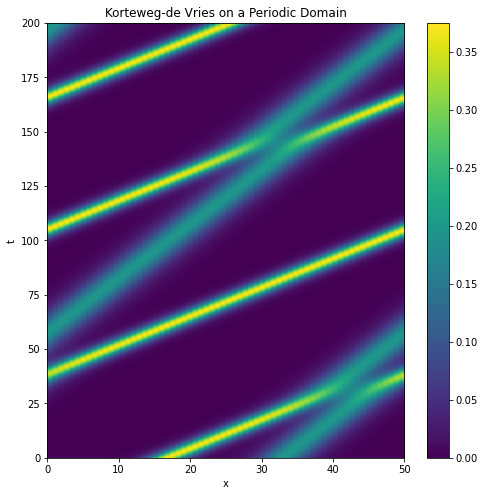

In [47]:
'''
Below is from SciPy docs - their discretized solutions 
and solutions on a periodic domain.
'''

# The exact solution to the KdV
def kdv_exact(x, c):
    """Profile of the exact solution to the KdV for a single soliton on the real line."""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

# The KdV model using FFT
def kdv(u, t, L):
    """Differential equations for the KdV equation, discretized in x."""
    # Compute the x derivatives using the pseudo-spectral method.
    ux = diffy(u, period=L)
    uxxx = diffy (u, period=L, order=3)

    # Compute du/dt.    
    dudt = -6*u*ux - uxxx

    return dudt

def kdv_solution(u0, t, L):
    """Use odeint to solve the KdV equation on a periodic domain.
    
    `u0` is initial condition, `t` is the array of time values at which
    the solution is to be computed, and `L` is the length of the periodic
    domain."""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol


if __name__ == "__main__":
    # Set the size of the domain, and create the discretized grid.
    L = 50
    N = 64
    dx = L / (N - 1.0)
    x = np.linspace(0, (1-1.0/N)*L, N)

    # Set the initial conditions.
    # Not exact for two solitons on a periodic domain, but close enough...
    u0 = kdv_exact(x-0.33*L, 0.75) + kdv_exact(x-0.65*L, 0.4)

    # Set the time sample grid.
    T = 200
    t = np.linspace(0, T, 501)

    print("Computing the solution.")
    sol = kdv_solution(u0, t, L)


    print("Plotting.")
    
    plt.figure(figsize=(8,8))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg-de Vries on a Periodic Domain')
    plt.show()

Values Matrix Shape:  (1000,)

Time Matrix Shape:  (1000,)

Soliton Matrix Shape:  (1000, 2) *Ensure it is (1000,2)*

-- -- -- -- --


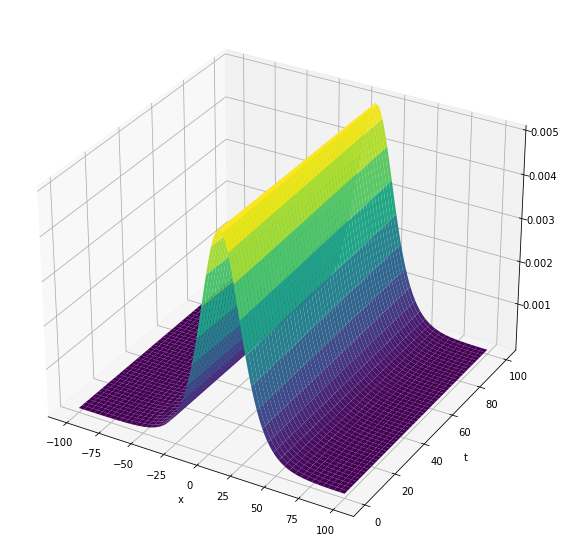

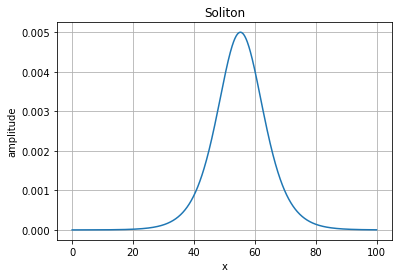

In [76]:
def soliton1(x, t): 
    c = 0.01
    z = 10
    return (-1/2 * c) * (1/np.cosh((np.sqrt(c)/2)*(x - c*t - z)))**2

x = np.linspace(-100, 100, 1000)
t = np.linspace(0, 100, 1000)
temp = soliton1(x,t)
time = np.linspace(0,100,1000)
print('Values Matrix Shape: ', temp.shape)
print('')
print('Time Matrix Shape: ', time.shape)
print('')
mat = np.column_stack((time,temp))
print('Soliton Matrix Shape: ', mat.shape, '*Ensure it is (1000,2)*')
print('')
visualize(soliton1)
print('-- -- -- -- --')
fig, ax = plt.subplots()
ax.plot(time, -temp)

ax.set(xlabel='x', ylabel='amplitude',
       title='Soliton')
ax.grid()
plt.show()


## PDE-FIND for KdV Equation

As mentioned in DDSE and work from University of Washington